Fake news Detection 

In [1]:

import pandas as pds
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
true_df = pds.read_csv('True.csv')
fake_df = pds.read_csv('Fake.csv')

In [3]:
print("shape of true_dataset:",true_df.shape)
true_df.head()

shape of true_dataset: (21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
print("shape of fake_dataset:",fake_df.shape)
fake_df.head()


shape of fake_dataset: (23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_df.isna().sum()


title      0
text       0
subject    0
date       0
dtype: int64

In [6]:
fake_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
true_df['target'] = ['True']*len(true_df)
fake_df['target'] = ['False']*len(fake_df)


In [8]:
data = true_df.append(fake_df).sample(frac=1).reset_index().drop(columns=['index'])
print("(rows,columns):",data.shape)
data.head()


(rows,columns): (44898, 5)


C:\Users\Home\AppData\Local\Temp\ipykernel_15816\4062299771.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = true_df.append(fake_df).sample(frac=1).reset_index().drop(columns=['index'])


,title,text,subject,date,target
0,Exclusive: Congress asks U.S. agencies for Kas...,LAS VEGAS (Reuters) - A U.S. congressional pan...,politicsNews,"July 28, 2017",True
1,DISMISSED: Trump Fires Scandal Plagued FBI Dir...,21st Century WireUS President Donald Trump has...,Middle-east,"May 10, 2017",False
2,Brexit transition deal will require new UK leg...,LONDON (Reuters) - The British government is p...,worldnews,"October 26, 2017",True
3,Trump's eldest son testifies to Senate committ...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"December 13, 2017",True
4,Rick Snyder Drinks Flint Water To Prove It Is...,Michigan Governor Rick Snyder was thirsty to p...,News,"April 19, 2016",False


In [9]:
#data['label'] = pd.get_dummies(data.target)['Fake']
#1 - Fake 0- Real
data['label'] = data['target'].apply(lambda x: 1 if x == 'False' else 0 )
data.head()

,title,text,subject,date,target,label
0,Exclusive: Congress asks U.S. agencies for Kas...,LAS VEGAS (Reuters) - A U.S. congressional pan...,politicsNews,"July 28, 2017",True,0
1,DISMISSED: Trump Fires Scandal Plagued FBI Dir...,21st Century WireUS President Donald Trump has...,Middle-east,"May 10, 2017",False,1
2,Brexit transition deal will require new UK leg...,LONDON (Reuters) - The British government is p...,worldnews,"October 26, 2017",True,0
3,Trump's eldest son testifies to Senate committ...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"December 13, 2017",True,0
4,Rick Snyder Drinks Flint Water To Prove It Is...,Michigan Governor Rick Snyder was thirsty to p...,News,"April 19, 2016",False,1


In [10]:
data.isna().sum()

title      0
text       0
subject    0
date       0
target     0
label      0
dtype: int64

<Axes: xlabel='label', ylabel='count'>

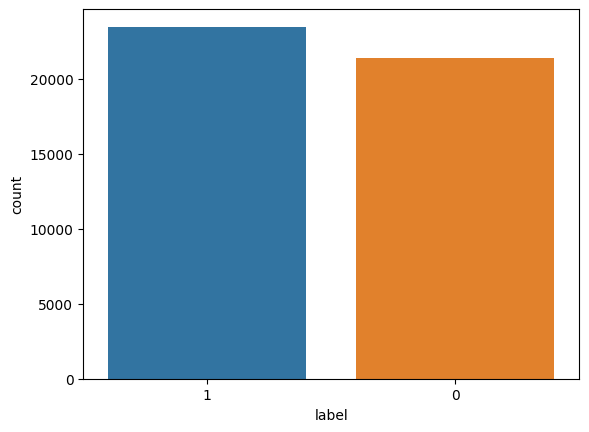

In [11]:
sns.countplot(data = data,x='label',order=data['label'].value_counts().index)


C:\Users\Home\AppData\Local\Temp\ipykernel_15816\971137136.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(fake_df.subject, palette = 'set1' , alpha = 0.5, ax = axes[0])
C:\Users\Home\AppData\Local\Temp\ipykernel_15816\971137136.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(true_df.subject , palette = 'Set1' , alpha = 0.5 , ax = axes[1])


Real news Subject :  {'politicsNews': 11272, 'worldnews': 10145}
Fake news Subject :  {'News': 9050, 'politics': 6841, 'left-news': 4459, 'Government News': 1570, 'US_News': 783, 'Middle-east': 778}


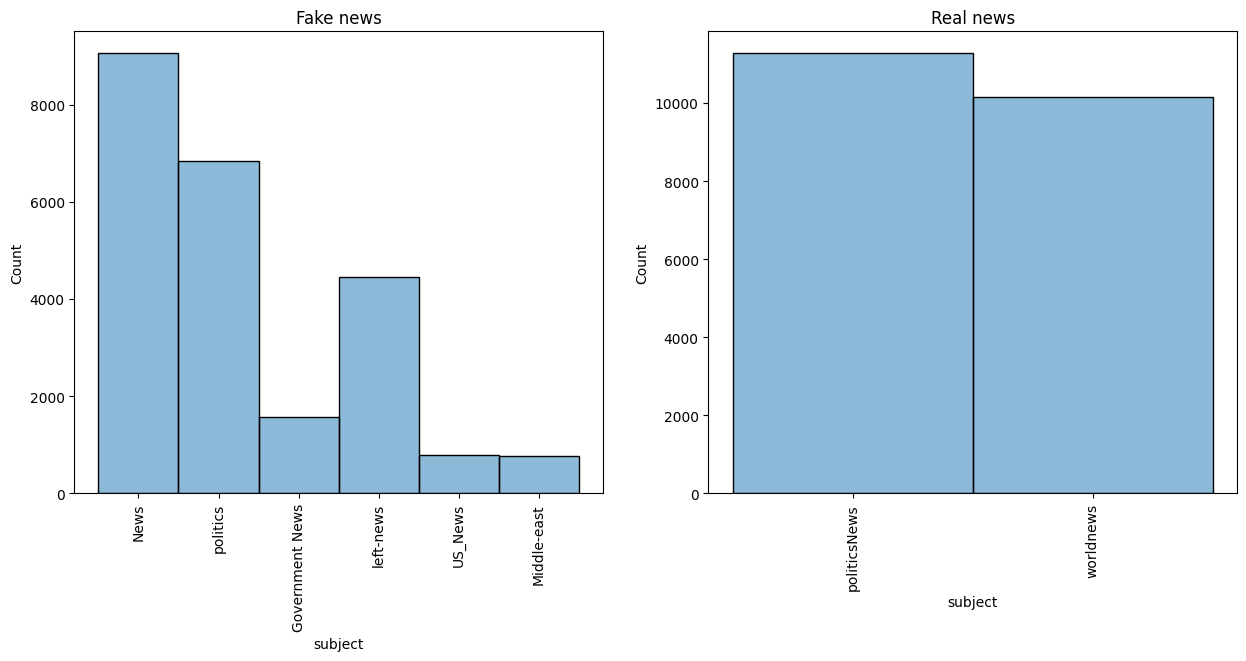

In [12]:
fig , axes = plt.subplots(1,2, figsize = (15,6))

sns.histplot(fake_df.subject, palette = 'set1' , alpha = 0.5, ax = axes[0])
axes[0].tick_params(axis = 'x' , rotation = 90)
axes[0].set_title('Fake news')

sns.histplot(true_df.subject , palette = 'Set1' , alpha = 0.5 , ax = axes[1])
axes[1].tick_params(axis = 'x' , rotation = 90)
axes[1].set_title('Real news')


print("Real news Subject : ",dict(true_df.subject.value_counts()))
print("Fake news Subject : ",dict(fake_df.subject.value_counts()))

1    23481
0    21417
Name: label, dtype: int64

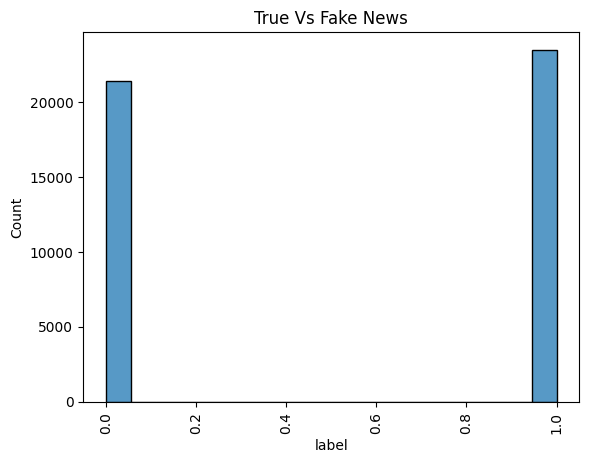

In [13]:
sns.histplot(data.label)
plt.tick_params(axis = 'x', rotation = 90)
plt.title("True Vs Fake News")
data.label.value_counts()

splitting the data into train and test and then converting into Vectors:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier


In [15]:
lab = data.label
lab.head()

0    0
1    1
2    0
3    0
4    1
Name: label, dtype: int64

In [16]:
#Data splitting 
x_train,x_test,y_train, y_test = train_test_split(data['text'],lab,test_size = 0.3)

In [24]:
#initialize a TfidfVectorizer
tfid = TfidfVectorizer(stop_words='english',max_df=0.7)
#fit and transform train set and transform test set
t_train = tfid.fit_transform(x_train)
t_test = tfid.transform(x_test)


In [28]:
#initialize a passiveAgressiveClasifier
pac  = PassiveAggressiveClassifier()
pac.fit(t_train,y_train)

#predict on the test set and caluculate accuracy  
y_pred = pac.predict(t_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.45%


In [42]:
#confusion matrix 
mat = confusion_matrix(y_test,y_pred,labels = [False , True])
mat

array([[6251,   36],
       [  38, 7145]], dtype=int64)

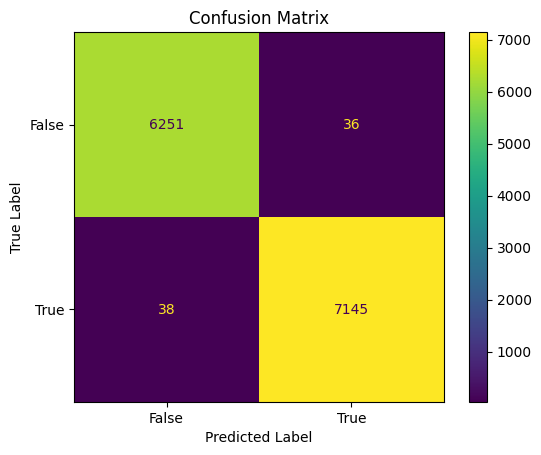

In [51]:
from sklearn import metrics 
mat = metrics.confusion_matrix(y_test,y_pred)
mat_dis = metrics.ConfusionMatrixDisplay(confusion_matrix = mat,display_labels = [False, True])
mat_dis.plot()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [60]:
from sklearn.linear_model import LogisticRegression
  
model = LogisticRegression()
model.fit(t_train, y_train)
y_pred1 = model.predict(t_test)
# testing the model
print("On training set Accuracy is : " ,accuracy_score(y_train, model.predict(t_train)))
print("On testing set Accuracy is :",accuracy_score(y_test, model.predict(t_test)))

lr = accuracy_score(y_test, model.predict(t_test))

On training set Accuracy is :  0.9909952908234695
On testing set Accuracy is : 0.9827765404602821


In [67]:
mat1 = metrics.confusion_matrix(y_test,y_pred1)
mat1


array([[6183,  104],
       [ 128, 7055]], dtype=int64)

In [68]:
from sklearn.tree import DecisionTreeClassifier
  
model = DecisionTreeClassifier()
model.fit(t_train, y_train)
y_pred = model.predict(t_test)
# testing the model
print("On Training set Accuracy is:",accuracy_score(y_train, model.predict(t_train)))
print("On Testing set Accuracy is : ",accuracy_score(y_test, model.predict(t_test)))

dt = accuracy_score(y_test, model.predict(t_test))

On Training set Accuracy is: 1.0
On Testing set Accuracy is :  0.9955456570155902


In [69]:
mat2 = metrics.confusion_matrix(y_test,y_pred)
mat2

array([[6248,   39],
       [  21, 7162]], dtype=int64)

Decision Tree and PassiveAgressiveClassifier are performing well